In [1]:
import tensorflow as tf
import tensorflow.compat.v1.keras.backend as K
import keras
import numpy as np
import json
import shap
import matplotlib
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

tf.compat.v1.disable_eager_execution()

print('Notebook running: tensorflow ', tf.__version__)
print('Notebook running: keras ', keras.__version__)


Notebook running: tensorflow  2.4.1
Notebook running: keras  2.4.3


In [2]:
# load pre-trained model and choose an image to explain
model = VGG16()
X,y = shap.datasets.imagenet50()
img = tf.keras.preprocessing.image.load_img("immagine.jpg", target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
to_explain = np.reshape(img,[-1,224,224,3]) #reshape for single image

preds = model.predict(preprocess_input(np.expand_dims(img.copy(), axis=0)))
decode_predictions(preds,top=5)[0] #Top 5 classes

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


[('n02481823', 'chimpanzee', 0.9827759),
 ('n02487347', 'macaque', 0.010363693),
 ('n02483708', 'siamang', 0.0026269974),
 ('n02484975', 'guenon', 0.0021866837),
 ('n02486261', 'patas', 0.00035251863)]

In [3]:

# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)
e = shap.GradientExplainer(
    (model.layers[7].input, model.layers[-1].output),
    map2layer(X, 7),
    local_smoothing=1 # std dev of smoothing noise
)

shap_values,indexes = e.shap_values(map2layer(to_explain, 7),ranked_outputs=1)


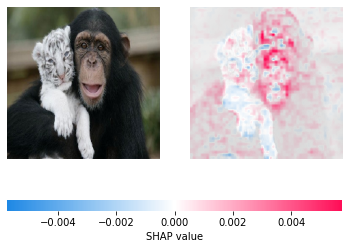

In [4]:
# plot the explanations
shap.image_plot(shap_values,to_explain)